In [ ]:
# import data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve

In [ ]:
# Plotting utility
from IPython.display import clear_output
class PlotLosses(tf.keras.callbacks.Callback):
    def __init__(self):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1

        clear_output(wait=True)
        fig, axes = plt.subplots(1,2,figsize=(8,3))

        axes[0].plot(self.x, self.losses, label="Train loss")
        axes[0].plot(self.x, self.val_losses, label="Validation loss")
        # axes[0].set_yscale('log')
        axes[0].set_xlabel('Number of epochs')
        axes[0].set_ylabel('Losses')
        axes[0].legend()

        axes[1].plot(self.x, self.acc, label="Train accuracy")
        axes[1].plot(self.x, self.val_acc, label="Validation accuracy")
        axes[1].set_xlabel('Number of epochs')
        axes[1].set_ylabel('Accuracy')
        # axes[1].set_ylim(0.85,1.)
        axes[1].legend()

        plt.tight_layout()
        plt.show();

In [ ]:
nupur_path = '/content/gdrive/MyDrive/Colab Notebooks/'
sophia_path = '/content/gdrive/MyDrive/Colab Notebooks/'
afham_path = '/content/gdrive/MyDive/Colab Notebooks/'

In [ ]:
data_dir = nupur_path

In [ ]:
# load images as matrices with a defined shape, split up train and validation
batch_size = 128
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale")

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    color_mode="grayscale")

Found 1372 files belonging to 2 classes.
Using 1098 files for training.
Found 1372 files belonging to 2 classes.
Using 274 files for validation.


In [ ]:
# normalize datasets

normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

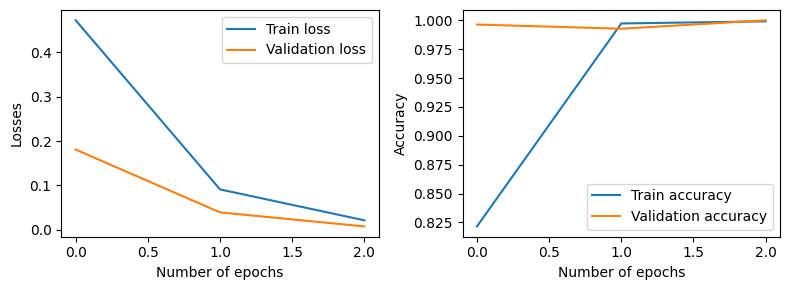

9/9 [==============================] - 20s 2s/step - loss: 0.0214 - accuracy: 0.9991 - val_loss: 0.0077 - val_accuracy: 1.0000


In [ ]:
# build the CNN and train

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2)
])


model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

plot_losses = PlotLosses()

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3, callbacks=[plot_losses]
)

In [ ]:
# look at performance